<a href="https://colab.research.google.com/github/stepsbtw/Quantum-Computing-and-Algorithms/blob/main/grovers_ibm_textbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O Algoritmo de Grover

Suponha que voce é dado uma grande lista de $N$ itens. Entre esses itens existe um com uma propriedade única que queremos localizar, vamos chamar este de winner ω.

Pense em cada item da lista como uma caixa de uma cor específica, e o desejado, com uma cor diferente, digamos roxa:

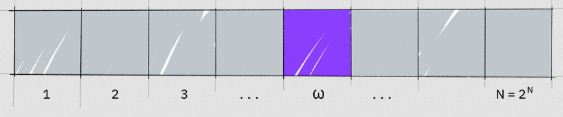

Para encontrar o item marcado - a caixa roxa -, usando computação clássica, seria necessário em média checar $N/2$ itens, e no pior dos casos, todos os $N$.

Em um computador quântico entretanto, podemos encontrar o item marcado em aproximadamente $\sqrt(N)$ passos com o truque de amplificação de amplitude de Grover.

Além disso, o algoritmo não usa a estrutura interna da lista, o que o torna genérico. É por isso que podemos ter essa melhora quadrática quântica em diversos problemas clássicos.

## Visão Geral do Algoritmo
O algoritmo de Grover consiste em 3 passos algorítmicos principais: Preparação dos estados, O Oráculo e o Operador Difusão.

A preparação dos estados é onde criamos o espaço de busca, com todas as possíveis saídas.

O oráculo é o que marca a resposta certa (ou respostas).

O operador difusão amplifica essas respostas para que possam se destacar e ser medidas no fim do algoritmo.

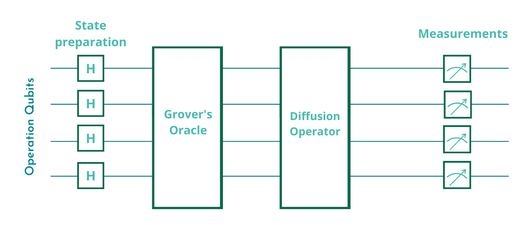

## Como funciona?

Antes de olhar a lista de itens, não temos ideia de qual é o item marcado.

Portanto qualquer chute será tão bom quanto qualquer outro, o que pode ser expresso como uma superposição uniforme:

$$
|s⟩ = \frac{1}{\sqrt(N)}∑^{N-1}_{x=0}|x⟩
$$

Se, nesse ponto, nós medirmos a base {$|x⟩$}, a superposição iria colapsar, e de acordo com a **quinta lei quântica**, para qualquer um dos estados base com a mesma probabilidade de $\frac{1}{N} = \frac{1}{2^n}$.

Nossa chance de chutar o valor certo ω seria 1 em $2^n$, e em média precisaríamos tentar por volta de $N/2 = 2^n-1$ vezes até encontrar o item correto.



## Amplificação de Amplitude

Aqui que entra portanto a amplificação de amplitude, que é como um computador quântico pode aumentar essa probabilidade significantemente. Esse procedimento amplifica a amplitude do item marcado, o que diminui as amplitudes dos outros itens, assim medir o estado final retornaria o item certo com quase-certeza.

O algoritmo tem uma interpretação geométrica interessante em termos de duas **reflexões**, que geram uma rotação em um plano bidimensional. Os únicos dois estados especiais que precisamos considerar é o desejado $|ω⟩$ e a superposição uniforme $|s⟩$.

Esses dois vetores geram plano bidimensional no vetor de espaços $ℂ^N$. Eles não são exatamente perpendiculares pois $|ω⟩$ ocorre em superposição com amplitude $N^{-1/2}$ também. Podemos entretanto introduzir um espaço adicional $|s'⟩$ que está no espaço gerado por estes dois vetores, que é **perpendicular** a $|\omega⟩$ e é obtido a partir de $|s⟩$, removendo $|ω⟩$ e redimensionando-o.

**Passo 1**: O procedimento de amplificação começa na superposição uniforme $|s⟩$. Pode ser fácilmente construída com:
$$
|s\rangle = H^{\otimes n} | 0 \rangle^n
$$

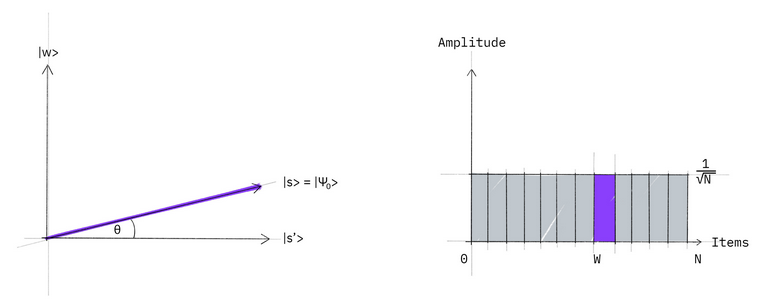

O gráfico a esquerda corresponde ao plano bidimensional gerado pelos vetores perpendiculares $|ω⟩$ e $|s'⟩$.

Isso nos permite expressar o estado inicial como:
$$|s⟩ = sinθ|w⟩ + cosθ|s'⟩$$ onde:
$$θ = arcsin⟨s|ω⟩ = arcsin(\frac{1}{\sqrt{N}}) $$

O gráfico de barras a direita corresponde as amplitudes do estado $|s⟩$.

**Passo 2**: Aplicamos a reflexão do oráculo $U_f$ no estado $|s⟩$.
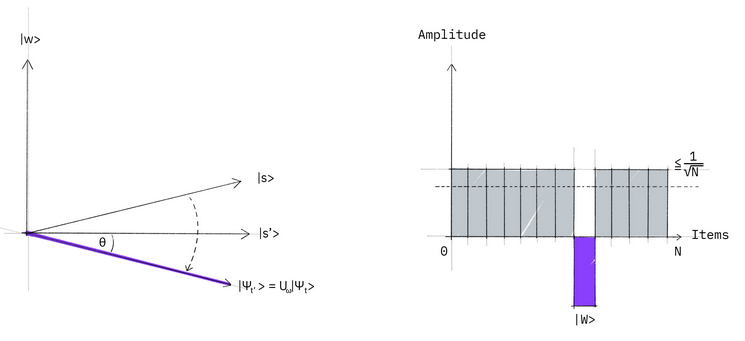

Geométricamente, isso corresponde a uma reflexão do estado $|s⟩$ em respeito a $|s'⟩$. Essa transformação significa que a amplitude do estado $|ω⟩$ fica negativa, que em resposta significa que a **amplitude média** (linha tracejada) diminuiu.

**Passo 3**: Agora aplicamos uma reflexão adicional $U_s$ sobre o estado $|s⟩$:

$$|s⟩ = 2|s⟩⟨s| - I$$. Essa transformação mapeia o estado para : $U_sU_f|s⟩$ e completa a transformação.

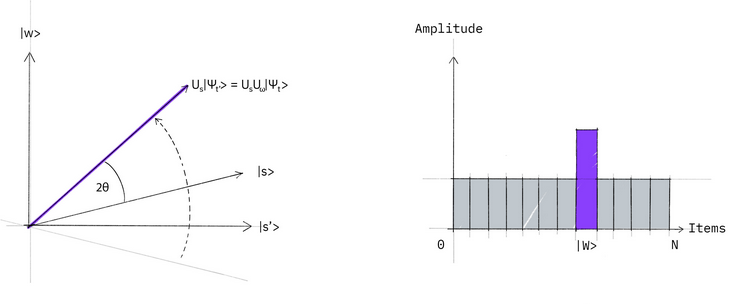

Duas reflexões **sempre** correspondem a uma rotação. A transformação $U_sU_f$ rotaciona o estado inicial $|s⟩$ mais próximo do estado desejado $|ω⟩$. A ação da reflexão $U_s$ no diagrama de amplitude pode ser entendida como uma reflexão sobre a amplitude média.

Como a amplitude média foi diminuida pela primeira reflexão, essa transformação impulsiona a amplitude negativa de $|ω⟩$ para aproximadamente **três vezes** o seu valor original, e diminui as outras amplitudes.

Então voltamos ao **Passo 2** e repetimos a aplicação. Esse processo é repetido várias vezes em 0 para o desejado.

Após $t$ passos, estaremos no estado: $$|𝜓_t⟩ = (U_sU_f)^t|s⟩$$

### Otimalidade
Quantas vezes precisamos aplicar essa rotação? Acaba que aproximadamente $\sqrt{N}$ é o suficiente.

Isso fica claro quando olhamos para as amplitudes do estado $|𝜓⟩$.

Vimos que a amplitude de $|ω⟩$ cresce linearmente com o número de aplicações $≈tN^{-1/2}$.

Entretanto, como estamos lidando com amplitudes e não probabilidades, a dimensão do vetor de espações entra como raíz quadrada. Ou seja, exatamente, é a amplitude que está sendo amplificada não somente a probabilidade.

Para calcular o número de rotações necessárias, precisamos saber o tamanho do espaço de busca, e o número de saídas que estamos procurando.

$$
t = ⌊\frac{\pi}{4}\sqrt{\frac{N}{m}}⌋
$$

Onde N é o tamanho do espaço de busca e m o número de respostas que queremos.

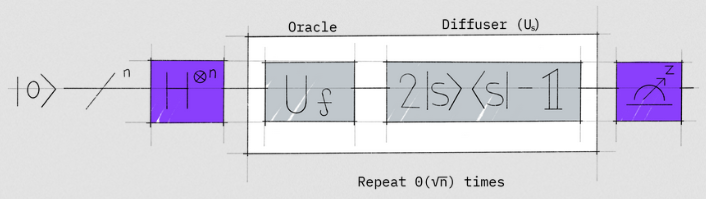

# Grover Passo a Passo

## 1. Preparando o espaço de busca
Nossa "base de dados" será composto por todos os possíveis estados básicos que nosso qubits podem estar.

Exemplo: Se temos 3 qubits, $|000⟩,|001⟩,⋯,|111⟩$, isto é: os estados $|0⟩ → |7⟩$. Nesse caso, o tamanho do nosso espaço de busca seria $N = 2^n = 8$.

## 2. Criando o Oráculo
Adiciona uma fase negativa para os estados soluções para que eles possam se destacar do resto e serem medidos. Isto é, pra qualquer estado $|x⟩$ na base:

$$
U_\omega|x\rangle = \bigg\{
\begin{aligned}
\phantom{-}|x\rangle \quad \text{if} \; x \neq \omega \\
-|x\rangle \quad \text{if} \; x = \omega \\
\end{aligned}
$$

Esse oráculo será uma matriz diagonal, onde a entrada correspondente ao item desejado irá ter fase negativa. Por exemplo se temos 3 qubits e $ω = 101$, nosso oráculo será a matriz:

$$
U_\omega =
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{aligned}
\\
\\
\\
\\
\\
\\
\leftarrow \omega = \text{101}\\
\\
\\
\\
\end{aligned}
$$

O que faz o algoritmo de Grover tão poderoso é a facilidade de converter o problema para um oráculo desta forma.

Problemas NP, por exemplo, o **Sudoku**. Podemos fácilmente verificar a solução, mas encontrá-la é difícil.

Para esses tipos de problemas podemos criar uma função $f$ que pega uma solução proposta $x$ e retorna $f(x) = 0$ se $x$ não for solução ($x \neq ω$) e $f(x) = 1$ se $x$ é solução valida, ($x = ω$).

Nosso oráculo pode ser descrito como:

$$
U_ω|x⟩ = (-1)^{f(x)}|x⟩
$$

e a matriz do oráculo será diagonal da forma:

$$
U_\omega =
\begin{bmatrix}
(-1)^{f(0)} &   0         & \cdots &   0         \\
0           & (-1)^{f(1)} & \cdots &   0         \\
\vdots      &   0         & \ddots & \vdots      \\
0           &   0         & \cdots & (-1)^{f(2^n-1)} \\
\end{bmatrix}
$$


## Construção do Circuito Quântico do Oráculo

Se temos a função clássica $f(x)$, podemos converter ela para o circuito reversível da forma:

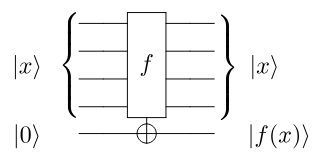

Se inicializarmos o qubit de saída com o estado $|-⟩$, torna isso em um Oráculo de Grover.
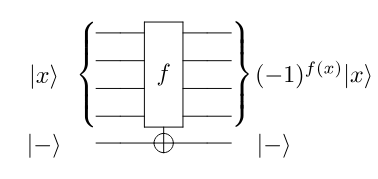

Podemos então ignorar o Qubit auxiliar $|-⟩$.

## 3. Operador de Difusão
Finalmente, após o oráculo marcar a resposta correta, a transformando em negativa, o último passo é aplicar o operador difusão.

A construçào desse operador depende em que decidimos usar para preparar nossos estados iniciais. Geralmente o operador de difusão possui a seguinte construção:

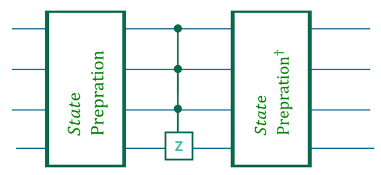

# Exemplo: 2 Qubits

Vamos dar uma olhada no caso de que $N = 4$, feito com 2 qubits. Nesse caso particular, apenas **uma rotação** é necessária para rotacionar o estado inicial $|s⟩$ para o desejado |ω⟩.

1. Então:
$$
θ = arcsin\frac{1}{2} = \frac{\pi}{6}
$$

2. Após $t$ passos, temos:

$$
(U_sU_ω)^t|s⟩ = senθ_t|ω⟩ + cosθ_t|s'⟩
$$

# Algoritmo de Grover e Amplificação de Amplitude

O algoritmo de Grover foi introduzido por [Lov Grover em 1996 ](https://arxiv.org/abs/quant-ph/9605043). Foi inicialmente proposto para resolver problemas de busca não estruturada, isto é, para encontrar um elemento marcado em uma base de dados não estruturada.

Entretanto, o algoritmo de Grover é agora uma subrotina para vários outros algoritmos como a [Grover Adaptative Search](https://arxiv.org/abs/1912.04088)